In [1]:
import lifelines as lf
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load the two differenet data sets
activeData = os.path.normpath("C:/Users/n846490/Documents/DataScience/CSVs/SurviveActive.csv")
active = pd.read_csv(activeData)

attritionData = os.path.normpath("C:/Users/n846490/Documents/DataScience/CSVs/SurviveAttrition.csv")
attrition = pd.read_csv(attritionData)

In [5]:
active.head()

,EffDate,ID,CostCtr,JobCode,JobTitle,HireDate,Network,Duration,MC,ProdCat,JobGroup,Observed
0,9/5/2016,642000,52,7766,Retail Banking PB Rep I-SBS,7/20/2015,X,14,X,Banker,PBR,0
1,9/5/2016,630006,2204,7766,Retail Banking PB Rep I-SBS,7/11/2011,X,62,X,Banker,PBR,0
2,9/5/2016,635935,2119,7766,Retail Banking PB Rep I-SBS,8/12/2013,X,37,X,Banker,PBR,0
3,9/5/2016,640860,2105,7766,Retail Banking PB Rep I-SBS,3/30/2015,X,18,X,Banker,PBR,0
4,9/5/2016,636705,2120,7766,Retail Banking PB Rep I-SBS,11/4/2013,X,34,X,Banker,PBR,0


In [4]:
active.columns = ['EffDate', 'ID', 'CostCtr', 'JobCode', 'JobTitle', 'HireDate', 'Network', 'Duration', 'MC',
                 'ProdCat', 'JobGroup', 'Observed']

In [8]:
attrition.head()

,EffDate,ID,JobTitle,CostCtr,LocnCode,HireDate,TermDate,Duration,MC,ProdCat,JobGroup,Observed
0,8/29/2016,639603,Retail Banking PB Rep II-SBS,2284,2284,10/6/2014,7/8/2016,21,X,Banker,PBR,1
1,8/29/2016,629575,Retail Banking PB Rep II-SBS,34,34,5/23/2011,7/5/2016,62,X,Banker,PBR,1
2,8/29/2016,637084,Universal Banker I - SBS,2122,2122,12/30/2013,6/28/2016,30,X,Banker,UB,1
3,8/29/2016,628893,Branch Manager,2131,2131,2/14/2011,8/5/2016,66,X,BM,BM,1
4,8/29/2016,632836,Branch Manager,2111,2111,7/9/2012,5/31/2016,46,X,BM,BM,1


In [7]:
attrition.columns = ['EffDate', 'ID', 'JobTitle','CostCtr', 'LocnCode', 'HireDate', 'TermDate', 'Duration', 'MC', 'ProdCat', 'JobGroup', 'Observed']

In [9]:
#Select and stack the dataframes into one
att = attrition[['ProdCat', 'JobGroup', 'Duration', 'Observed']]

act = active[['ProdCat', 'JobGroup', 'Duration', 'Observed']]

frames = [att, act]

allData = pd.concat(frames)

allData.head()
#allData.tail()

,ProdCat,JobGroup,Duration,Observed
0,Banker,PBR,21,1
1,Banker,PBR,62,1
2,Banker,UB,30,1
3,BM,BM,66,1
4,BM,BM,46,1


In [10]:
# get the info on the stacked data
allData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5360 entries, 0 to 4058
Data columns (total 4 columns):
ProdCat     5360 non-null object
JobGroup    5360 non-null object
Duration    5360 non-null int64
Observed    5360 non-null int64
dtypes: int64(2), object(2)
memory usage: 209.4+ KB


In [11]:
#write the combined data to a csv for storing

allData.to_csv(os.path.normpath("C:/Users/n846490/Documents/DataScience/CSVs/combinedAttrtionData2016.csv"))

In [12]:
#first try the KaplainMeierFitter
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [13]:
T = allData["Duration"]
C = allData["Observed"]

kmf.fit(T, event_observed=C)

<lifelines.KaplanMeierFitter: fitted with 5360 observations, 4059 censored>

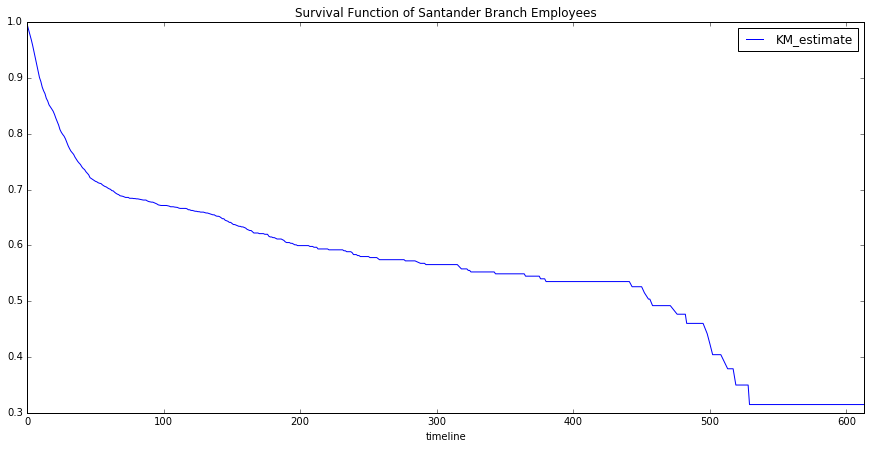

In [14]:
kmf.survival_function_.plot(figsize = (15,7))
plt.title('Survival Function of Santander Branch Employees')

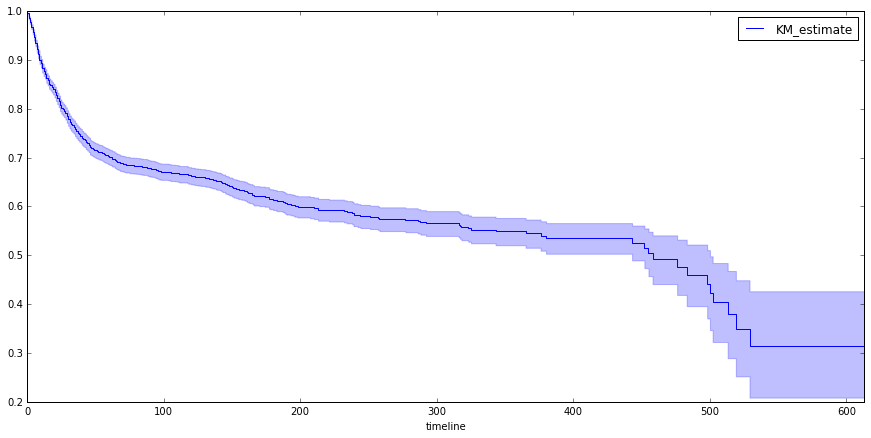

In [15]:
kmf.plot(figsize = (15,7))

In [16]:
#find the median time people stay
kmf.median_

458.0

In [17]:
458/12

38.166666666666664

In [18]:
#find the number of different positions
allData.groupby('ProdCat').count()

,JobGroup,Duration,Observed
ProdCat,,,
BBRM,8,8,8
BM,781,781,781
BOM,567,567,567
Banker,1795,1795,1795
DE,47,47,47
FC,46,46,46
MDO,37,37,37
Morg RSM,3,3,3
SBRM,33,33,33


In [19]:
#check by jobgroup also
allData.groupby('JobGroup').count()


,ProdCat,Duration,Observed
JobGroup,,,
BBRM,8,8,8
BM,781,781,781
BOM,567,567,567
DE,47,47,47
FC,46,46,46
MDO,37,37,37
Morg RSM,3,3,3
PBR,945,945,945
Premier,170,170,170


(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 6 Text yticklabel objects>)

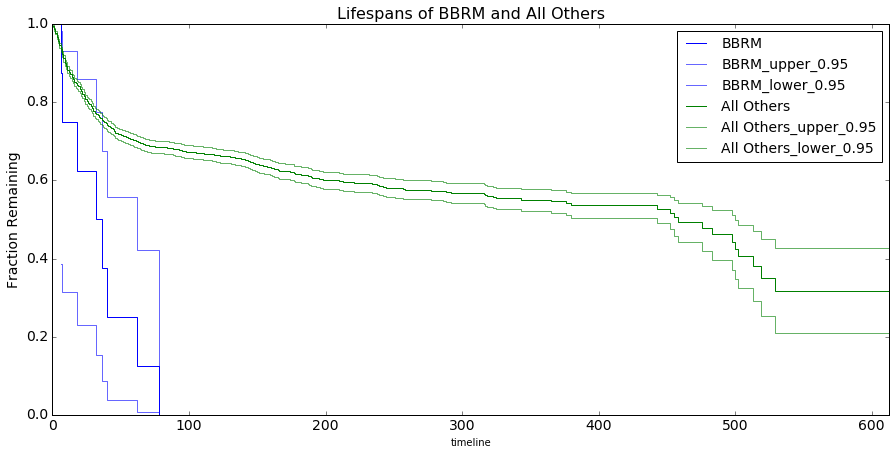

In [20]:
ax = plt.subplot(111)

service = (allData["ProdCat"] == "BBRM")
kmf.fit(T[service], event_observed = C[service], label = "BBRM")
kmf.plot(ax = ax, ci_force_lines = True)
kmf.fit(T[~service], event_observed = C[~service], label = "All Others")
kmf.plot(ax = ax, ci_force_lines=True, figsize = (15,7))

plt.ylim(0,1)
plt.title("Lifespans of BBRM and All Others", size = 16)
plt.legend(loc=1,prop={'size':14})
plt.xticks(fontsize = 14)
plt.ylabel("Fraction Remaining", fontsize = 14)
plt.yticks(fontsize = 14)

In [22]:
#create categories for essentially Service, Bankers, etc.
#BOM, UOS and Tellers are Combined to service


def createGroupings(row):
    if row['ProdCat'] == 'BOM' :
        return 'Service'
    if row['ProdCat'] == 'UOS' :
        return 'Service'
    if row['ProdCat'] == 'Teller' :
        return 'Service'
    
#combined the mortgage people    
    if row['ProdCat'] == 'MDO' :
        return 'MDOandRSM'
    if row['ProdCat'] == 'Morg RSM' :
        return 'MDOandRSM'   

    #combine the small biz people    
    if row['ProdCat'] == 'BBRM' :
        return 'BBRM'    
    if row['ProdCat'] == 'SBRM' :
        return 'SBRM'    
       
#now we'll just return the others as is    
    if row['ProdCat'] == 'Banker' :
        return 'Banker' 
    if row['ProdCat'] == 'BM' :
        return 'BranchMgr'
    if row['ProdCat'] == 'DE' :
        return 'DE'
    if row['ProdCat'] == 'FC' :
        return 'FC'

In [23]:
allData.apply (lambda row: createGroupings (row), axis = 1)

0          Banker
1          Banker
2          Banker
3       BranchMgr
4       BranchMgr
5       BranchMgr
6       BranchMgr
7       BranchMgr
8       BranchMgr
9       BranchMgr
10      BranchMgr
11      BranchMgr
12      BranchMgr
13      BranchMgr
14      BranchMgr
15      BranchMgr
16      BranchMgr
17      BranchMgr
18      BranchMgr
19      BranchMgr
20      BranchMgr
21      BranchMgr
22      BranchMgr
23      BranchMgr
24      BranchMgr
25      BranchMgr
26      BranchMgr
27      BranchMgr
28      BranchMgr
29      BranchMgr
          ...    
4029           DE
4030           DE
4031           DE
4032           DE
4033           DE
4034           DE
4035           DE
4036           DE
4037           DE
4038           DE
4039           DE
4040           DE
4041           DE
4042           DE
4043           DE
4044           DE
4045           DE
4046           DE
4047           DE
4048           DE
4049           DE
4050           DE
4051           DE
4052           DE
4053      

In [24]:
allData['BranchGroupings'] = allData.apply(lambda row: createGroupings(row), axis = 1)

In [25]:
#get length of DF before removing DE
len(allData)


5360

In [26]:
allData.head()

,ProdCat,JobGroup,Duration,Observed,BranchGroupings
0,Banker,PBR,21,1,Banker
1,Banker,PBR,62,1,Banker
2,Banker,UB,30,1,Banker
3,BM,BM,66,1,BranchMgr
4,BM,BM,46,1,BranchMgr


In [27]:
#write the combined data to a csv for storing

allData.to_csv(os.path.normpath("C:/Users/n846490/Documents/DataScience/CSVs/combinedAttrtionData2016withGroupingsRev1.csv"))

Median Employment Duration of branch Service Employees : 36.0


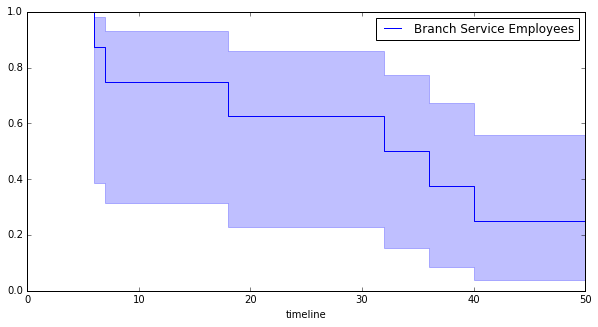

In [30]:
ax = plt.subplot(111)

t = np.linspace(0,50,51)
kmf.fit(T[service], event_observed=C[service], timeline = t, label = "Branch Service Employees")
ax = kmf.plot(ax=ax, figsize = (10,5))

print("Median Employment Duration of branch Service Employees :", kmf.median_)

In [ ]:
#check if there are differences


from lifelines.statistics import logrank_test

results = logrank_test(T[service], T[~service], C[service], C[~service], alpha  = .99)

results.print_summary()

In [31]:
branchGroups = ['BranchMgr', 'Banker', 'Service', 'MDOandRSM', 'SBRM', 'BBRM','FC']

print(branchGroups)

['BranchMgr', 'Banker', 'Service', 'MDOandRSM', 'SBRM', 'BBRM', 'FC']


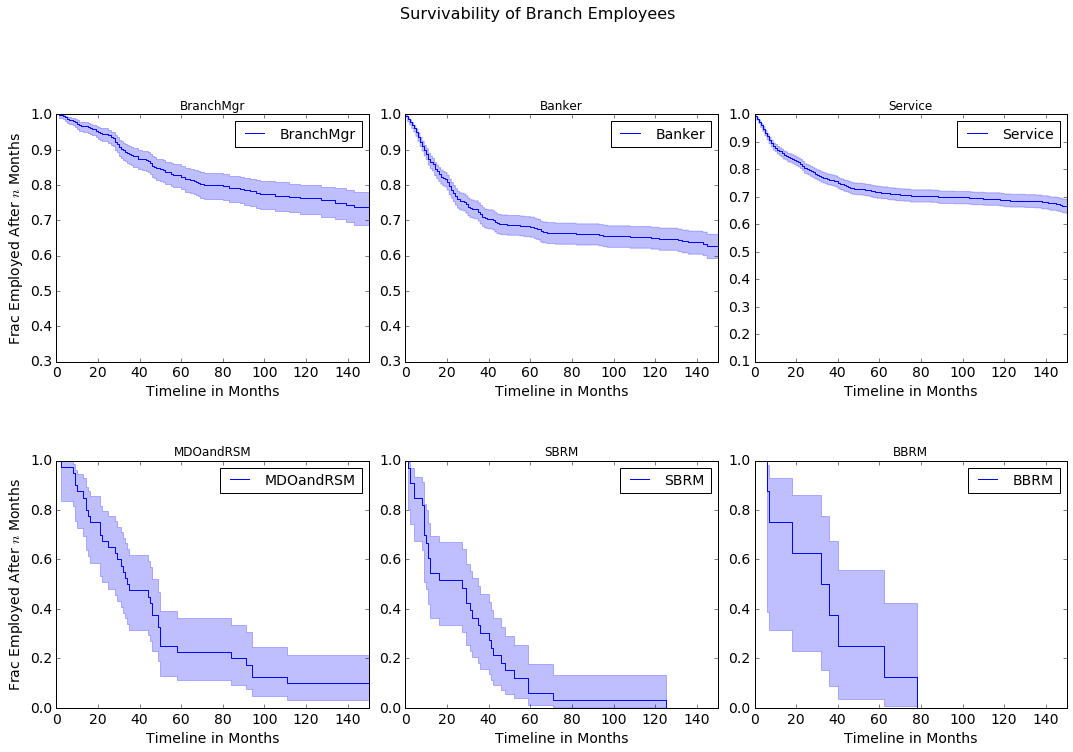

In [33]:
branchGroups = ['BranchMgr', 'Banker', 'Service', 'MDOandRSM', 'SBRM', 'BBRM']

#branchGroups = allData['BranchGroupings'].unique()

fig = plt.figure(figsize = (15,15))

for i,branchGroups in enumerate(branchGroups):
    ax = plt.subplot(3,3,i+1)
    ix = allData['BranchGroupings'] == branchGroups
    
    kmf.fit(T[ix], C[ix], label=branchGroups)
    
    
    kmf.plot(ax=ax, legend=False)
    plt.title(branchGroups)
    plt.xlabel('Timeline in Months', size = 14)
    plt.legend(loc=1,prop={'size':14})
    plt.xlim(0,150)
    plt.yticks(fontsize = 14)
    plt.xticks(fontsize = 14)
    if  i ==0:
        plt.ylabel('Frac Employed After $n$ Months', size = 14)
    if  i ==3:
        plt.ylabel('Frac Employed After $n$ Months', size = 14)
        
fig.tight_layout()
fig.suptitle('Survivability of Branch Employees', size = 16)
fig.subplots_adjust(top=0.88, hspace = .4)
plt.show()

In [34]:
#perfrom the NelsonAalenFitter to fined the cummulative hazard
T = allData['Duration']
C = allData['Observed']


from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()

naf.fit(T,event_observed=C)

<lifelines.NelsonAalenFitter: fitted with 5360 observations, 4059 censored>

In [35]:
#now we can plot the cumulative hazard
naf.cumulative_hazard_.head()

,NA_estimate
timeline,
0.0,0.004300
1.0,0.013213
2.0,0.021872
3.0,0.032005
4.0,0.042630


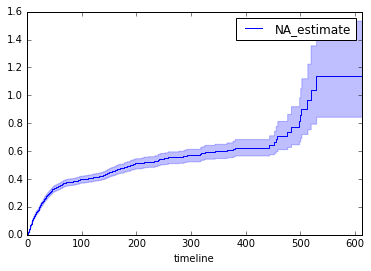

In [36]:
naf.plot()

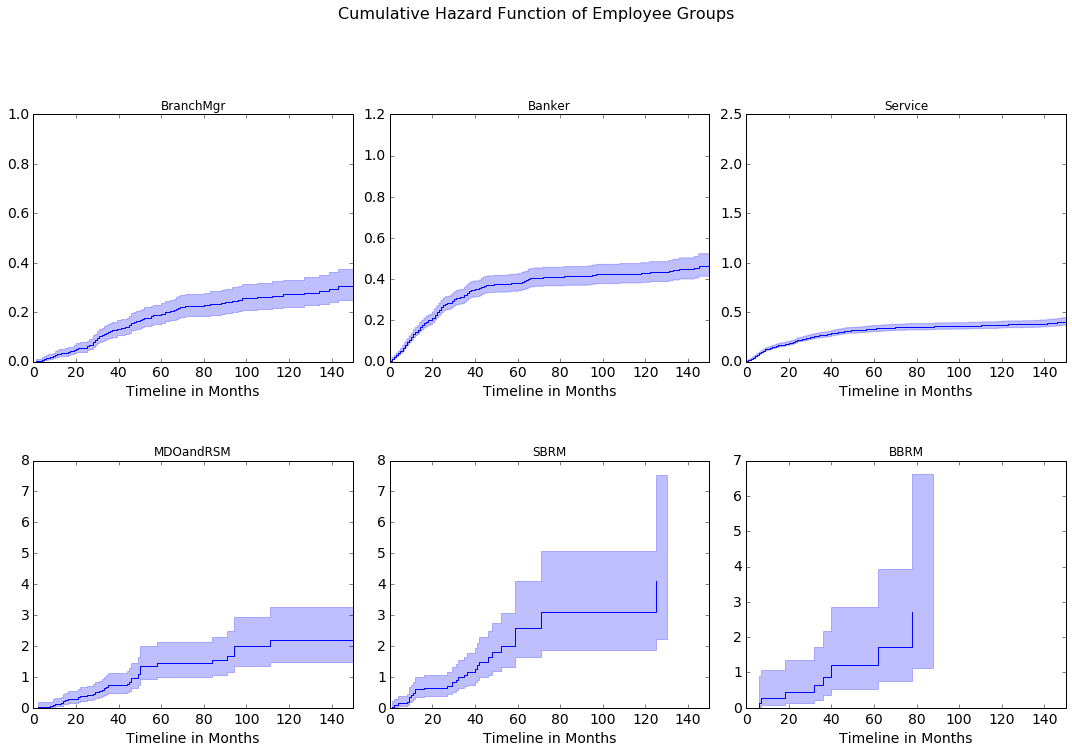

In [38]:
#try plotting the cumulative hazards by job

branchGroups = ['BranchMgr', 'Banker', 'Service', 'MDOandRSM', 'SBRM', 'BBRM']

#branchGroups = allData['BranchGroupings'].unique()

fig2 = plt.figure(figsize = (15,15))

for i,branchGroups in enumerate(branchGroups):
    ax = plt.subplot(3,3,i+1)
    idx = allData['BranchGroupings'] == branchGroups
    
    naf.fit(T[idx], C[idx], label=branchGroups)
    
    
    naf.plot(ax=ax, legend=False)

    plt.title(branchGroups)
    plt.xlabel('Timeline in Months', size = 14)
    plt.xlim(0,150)
    plt.yticks(fontsize = 14)
    plt.xticks(fontsize = 14)

        
fig2.tight_layout()
fig2.suptitle('Cumulative Hazard Function of Employee Groups', size = 16)
fig2.subplots_adjust(top=0.88, hspace = .4)
plt.show()

In [ ]:
#create the slice using the .copy
noDE = allData[['ProdCat', 'Duration', 'Observed', 'BranchGroupings']].copy()


In [ ]:
#remove the DE from the data set
noDE = noDE.loc[noDE['BranchGroupings'] != 'DE']

In [ ]:
noDE.head()

In [ ]:
noDE.index.is_unique

In [ ]:
#reset the index so that it is unique
noDE['index'] = np.arange(len(noDE))
noDE = noDE.set_index('index')

In [ ]:
Groups = noDE['BranchGroupings'].unique()
print(Groups)

In [ ]:
Groups = ['BranchMgr', 'Banker', 'Service', 'MDOandRSM', 'SBRMandBBRM','FC']

fig3 = plt.figure(figsize = (15,15))

for i,Groups in enumerate(Groups):
    ax = plt.subplot(3,3,i+1)
    idxx = noDE['BranchGroupings'] == Groups
    
    kmf.fit(T[idxx], C[idxx], label=Groups)
    
    
    kmf.plot(ax=ax, legend=False)
    plt.title(Groups)
    plt.xlabel('Timeline in Months')
    plt.xlim(0,150)
    if  i ==0:
        plt.ylabel('Frac Employed After $n$ Months')
    if  i ==3:
        plt.ylabel('Frac Employed After $n$ Months')
        
fig3.tight_layout()
fig3.suptitle('Survivability of Branch Employees ex DE', size = 16)
fig3.subplots_adjust(top=0.88, hspace = .4)
plt.show()

In [ ]:
#plot the hazards with bandwith = 3
b = 3.

Groups = ['BranchMgr', 'Banker', 'Service', 'MDOandRSM', 'SBRMandBBRM','FC']

fig4 = plt.figure(figsize = (15,15))

for i,Groups in enumerate(Groups):
    ax = plt.subplot(3,3,i+1)
    idnx = noDE['BranchGroupings'] == Groups
    
    naf.fit(T[idnx], C[idnx], label=Groups)
    
    
    naf.plot(ax=ax, bandwidth=b, legend=False)
    
    plt.title(Groups)
    plt.xlabel('Timeline in Months')
    plt.xlim(0,150)
    if  i ==0:
        plt.ylabel('Frac Employed After $n$ Months')
    if  i ==3:
        plt.ylabel('Frac Employed After $n$ Months')
        
fig4.tight_layout()
fig4.suptitle("Hazard function of different Branch Employee Groups \n Bandwith=%.1f"%b, size = 16)
fig4.subplots_adjust(top=0.88, hspace = .4)
plt.show()
